# Linear Algebra

### This notebook will use Python and Numpy to script some basic linear algebra concepts. We will avoid using numpy and scipy linalg functions because they hide the mechanics of the calculations which is counter to the aim of learning and understanding the topic. I strongly recommend doing the calculations by hand as well as using the functions here and comparing the answers.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Dot Products

### The concept

The dot product is a flavour of multiplication that takes into account the similarities between two vectors. It is often described as "directional multiplication" or "the push that one vector gives another" or "applying one vector to another". It can be thought of as a measure of similarity because it operates on shared dimensions and ignores interactions between different dimensions, i.e. the sum of (x * x, y * y, z * z). It returns a scalar - i.e. a single digit, a point, a dot! 

The dot product returns a scalar from two vectors, or a vector from a matrix and a vector. 

#### 1. The rectangular interpretation

The dot product multiplies the x component and the y component of two vectors.

#### 2. The rotational interpretation

The dot product can be thought of as multiplying two vectors after one has been projected onto the other (i.e. it has been rotated so that both vectors line up).


My favourite is the Mario Karts analogy explained here: https://betterexplained.com/articles/vector-calculus-understanding-the-dot-product/. In this game there are speed boosters on the track that give a greater acceleration to karts travelling parallel to the booster, wth diminishing acceleration as the kart's direction of travel becomes more perpendicular to the booster. The boost (a scalar multiplier of the kart's pre-boost velocity) is calculated as the dot product of the velocity of the kart and the velocity of the booster. This means if the kart is travelling at 0 m/s the boost is 0 (scalar * 0 = 0) and if the kart is travelling perpendicular to the booster the boost is 0 (because the component of the karts velocity vector that aligns with the booster is 0, so scalar * 0 = 0).

### The calculation

There are two ways to calculate the dot product. The first uses the law of cosines, the second is the sum of products.


$a⋅b = ∥a∥ ∥b∥ cosθ$

i.e. length of vector a * length of vector b * cosine of angle between vectors a and b.

This method is most closely associated with the rotational explanation of the dot product, since it explicitly takes into account the angle between the two vectors.

The alternative is simply to calculate the sum of element-wise products between the two vectors. i.e.

$ \Sigma (a_1b_1 , a_2b_2, ... a_n b_n) $


### Dot Product in Python

Let's start by building custom functions so we understand how the dot product is calculated. We will start with a simpe function for the sum of products method for the dot product. We will then write a short function for calculating the angle between the two vectors using a simple rearrangement of the cosine dot product equation. We will then use that angle to calculate the dot product using the law of cosines method. Finally, we will quickly check that our answers from the two methods agree with one another.

In [2]:
######################
# 1. Define functions

def dotprod(a,b):
    
    """
    sum of products method
    params: vector a, vector b
    returns: result (dot product of a and b)
    """
    OutList = []
    
    for i in np.arange(0,len(a),1):
        
        OutList.append(a[i]*b[i])
    
    result = np.sum(np.array(OutList))
        
    # we could alternatively use numpy built-in funcs to do this in one line without iteration
    # result = np.sum(np.multiply(a,b)) 
    
    return result


def find_angle(a,b):
    
    """
    find angle between vectors a and b
    
    params: vector a, vector b
    returns: angle between vectors a and b
    """
    
    a = np.array(a)
    b = np.array(b)
    
    angle = (a.dot(b))/np.linalg.norm(a)*np.linalg.norm(b)
    
    return angle



def dotprod_cosine(a,b,angle):
    
    """
    find dot product between vectors a and b using cosine method
    
    params: vector a, vector b
    returns: result (dot product of a and b)
    
    """
    
    angle = angle * (np.pi/180)
    
    result = np.linalg.norm(a)*np.linalg.norm(b)*np.cos(angle)
    
    return result



######################
# 2. Define vectors

v = [4,5,6]
w = [1,2,3]


#######################################
# 3. Call functions and compare results

angle = find_angle(v,w)

result1 = dotprod_cosine(v,w,angle)
print(np.round(result1,0))

result2 = dotprod(v,w)
print(np.round(result2,0))
      
# check results agree, including numpy's .dot() function

if np.round(result1,0)==np.round(result2,0)==np.round(np.dot(v,w),2):

    print("\nRESULTS AGREE")

else:
    
    print("RESULTS DO NOT AGREE!")

32.0
32

RESULTS AGREE


## Cross Product

The cross product is a cross-dimensional product - rather than meausuring similarity (shared dimensions) as the dot product does , the cross product measures dissimilarity (non-shared dimensions). 

The cross product between two vectors produces a third vector that is *perpendicular to both the original vectors*, i.e. a vector in the x dimension crossed with a vector in the y dimension produces a vector in the z dimension. 

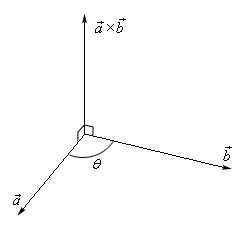

The magnitude (length) of that z-vector is equal to the area of the parallelogram formed by the original vectors in the x,y plane.


The maximum magnitude of the dot product occurs when the x and y vectors are perpendicular and diminishes to zero when the x and y vectors are parallel. The concept extends to vectors in more than 2 dimensions.

It is sometimes called the "vector product" because it returns a vector rather than a scalar value.


### Calculation

Similarly to the dot product there are multiple ways to calculate the cross product. First is the "trigonometric" approach and the second is the numeric approach.

#### 1. The trigonometric approach 

The trigonometric approach multiplies the product of the length of vectors a and b by the sine of the angle between them. The result is then multiplied by the unit vector in the new dimension, to ensure the vector points in the right direction. 


$a × b = |a| |b| sin(θ) n$



#### 2. The numeric approach

The numeric approach calculates the difference between the products of the vectors in non-matching dimensions (i.e. for vector a and vector b that exist in dimensions x,y,z, we are *not* interested in $ ax * bx, ay * by$ or $az * bz$). So the x, y and z coordinates of the vector $c$, which is the cross product for vectors $a$ and $b$ is equal to...

$cx = aybz − azby$

$cy = azbx − axbz$

$cz = axby − aybx$	

a simple way to see vectors in x and y dimensions producing a vector in the z dimension is to take the cross product of the unit vectors $a$ and $b$.

a = [1,0,0]
b = [0,1,0]

cx = aybz - azby = 0 * 0 - 0 * 1 = 0
cy = azbx - axbz = 0 * 0 - 1 * 0 = 0
cz = axby - aybx = 1 * 1 - 0 * 1 = 1

c = [0,0,1]


### Cross product in Python

Again we will start by building custom functions so we understand how the cross product is calculated. Then we will check the results against the NumPy built-in function.

In [4]:
a = [1,2,3]
b = [4,5,6]

def cross_prod(a,b):
    
    c = np.zeros(len(a))
    c[0] = int(a[1]*b[2])-(a[2]*b[1])
    c[1] = int(a[2]*b[0])-(a[0]*b[2])
    c[2] = int(a[0]*b[1])-(a[1]*b[0])
    
    return c

c = cross_prod(a,b)
print("cross product by custom function:\n\n",c)

result1 = np.cross(a,b)
print("\n\ncross product by NumPy func:\n\n",result1)




cross product by custom function:

 [-3.  6. -3.]


cross product by NumPy func:

 [-3  6 -3]


## Solving systems of equations

### Part 1: Gaussian elimination

First we will define some functions to allow us to perform some elementary row operations. We will then use these elementary row functions to reorganise the array A into row echelon form, then we can solve it to find values from x, y and z that satisfy all 3 equations.

First, we will need to swap rows.
Second, we need a way to multiply individual rows by a scalar in place.
Finally, we need a way to add multiples of rows to other rows.

In [5]:

def SwapRows(A, idx1, idx2):
    
    temp = A[idx2,:].copy()
    A[idx2,:] =A[idx1,:]
    A[idx1,:] = temp

    return A


def multiply_row(A,idx1,multiple):

    A[idx1,:]=A[idx1,:]*multiple

    return A



def add_rows(A,add_to,add_from,multiple):

    # start with identity matrix
    E1 = np.array([[1,0,0],[0,1,0],[0,0,1]])

    E1[add_to,add_from] = multiple

    A = E1@A

    return A


Now we have these elementary row operations available to us, we can start to rearrange an array into row echelon form.

Let's set up an initial array that represents the following system of 3 linear equations:

$x + 2y + 3z = 24$

$2x - y + z = 3$

$3x + 4y -5z = -6$


In [6]:
A = np.array([[1,2,3,24],[2,-1,1,3],[3,4,-5,-6]])

print(A)

[[ 1  2  3 24]
 [ 2 -1  1  3]
 [ 3  4 -5 -6]]


The following sequence of swaps, additions and multiplications reorganizes the array into row echelon form. hThere is probably a more efficient route - I determined this way to work, please feel free to try to find a better sequence.

In [7]:

A = SwapRows(A,0,1)
A = SwapRows(A,0,2)
A = SwapRows(A,1,2)
A = add_rows(A,1,2,-1)
A = add_rows(A,1,2,-1)
A = SwapRows(A,1,2)
A = add_rows(A,0,2,-1)
A = add_rows(A,0,1,-3)
A = SwapRows(A,0,1)
A = multiply_row(A,1,5)
A = add_rows(A,1,2,3)
A = SwapRows(A,1,2)


print("Array A in Row Echelon Form\n\n",A)

Array A in Row Echelon Form

 [[   1    2    3   24]
 [   0   -5   -5  -45]
 [   0    0  -60 -300]]


This yields a sequence of equations that can easily be solved by cascading variable values up the array, since:

$-60z = -300$

$-5y -5z = -45$

$x + 2y + 3z = 24$



$$
$$
$ z = -300 / -60$,

so $z = 5 $
$$
$$
$ -5 y - (-5 * 5) = -45$, 
$$
$$
so $y = 4 $
$$
$$
$ z + (2 * 4) + (3 * 5) = 24$, 
$$
$$
so $x = 1 $
$$
$$


This has therefore given the solution to the system of equations:

$x = 1$

$y = 4$

$z = 5$


### Part 2: Gauss-Jordan elimination

We could also achieve this using Gauss-Jordan elimination by reducing the row-echelon form to give the values for x,y and z in the augmented matrix. The aim of this is to reduce the system matrix to be equal to the identity matrix. The augmented matrix then represents the solution to the system of equations.

In [8]:
A = multiply_row(A,0,5)
A = multiply_row(A,1,2)
A = add_rows(A,0,1,0)
A = add_rows(A,0,1,1)
A = multiply_row(A,0,1/5)
A = multiply_row(A,1,-1/10)
A = multiply_row(A,2,-1/60)
A = add_rows(A,0,2,-1)
A = add_rows(A,1,2,-1)

In [9]:
print("A in REDUCED ECHELON FORM\n\n")
print(A)
print()

A in REDUCED ECHELON FORM


[[1 0 0 1]
 [0 1 0 4]
 [0 0 1 5]]



The augmented matrix in reduced row echelon form offers a solution in the form of x, y and z values in rows 0, 1 and 2. Again, this method gives:

$x = 1$

$y = 4$

$z = 5$

### Part 3: Numpy's solver

To be completely sure we have the correct answer we can also fall back to Numpy.linalg's solver. To do this we import the relevant package and pass the system matrix and the augmented matrix as separate variables.

In [10]:
# import our original matrix
A = np.array([[1,2,3,24],[2,-1,1,3],[3,4,-5,-6]])

# separate into system matrix (M) and augmented matrix (b)
M = A[:,0:-1]
b = A[:,-1]

print("System Matrix M:\n")
print("\n",A)
print("\nAugmented matrix, b")
print("\n",b)

System Matrix M:


 [[ 1  2  3 24]
 [ 2 -1  1  3]
 [ 3  4 -5 -6]]

Augmented matrix, b

 [24  3 -6]


In [11]:
from numpy.linalg import solve as slv

x,y,z = slv(M,b)

print("x = ",np.round(x,0))
print("y = ",np.round(y,0))
print("z = ",np.round(z,0))

x =  1.0
y =  4.0
z =  5.0


Success - the three methods all provide the same solutions!